# Analisis Exploratorio del Titanic

Este cuaderno resume los pasos de exploracion del dataset Titanic disponible en seaborn.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="Set2")

In [2]:
# Carga del dataset Titanic desde seaborn
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Dimensiones y esquema de columnas
print("Dimensiones del dataset (filas, columnas):", df.shape)
df.info()

Dimensiones del dataset (filas, columnas): (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# Valores nulos
null_counts = df.isnull().sum()
null_counts

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

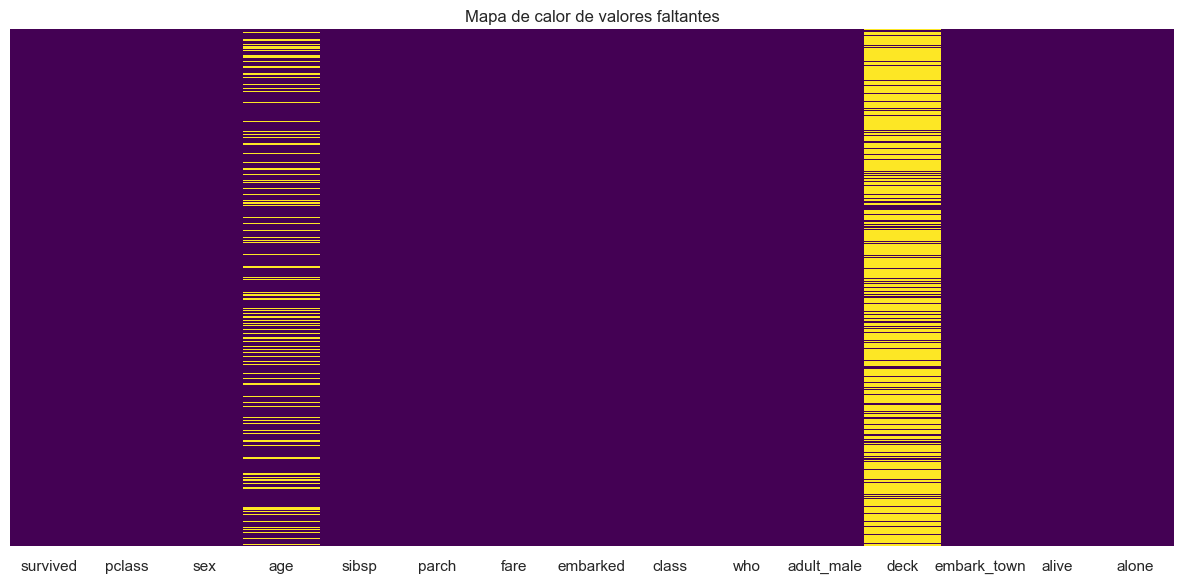

In [5]:
# Mapa de calor de valores faltantes
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Mapa de calor de valores faltantes")
plt.tight_layout()
plt.show()

In [6]:
# Estadisticas descriptivas para variables numericas
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Distribucion de variables categoricas
categorical_cols = df.select_dtypes(include=["object", "category", "bool"]).columns
for col in categorical_cols:
    display(df[col].value_counts(dropna=False).to_frame(name="count"))

,count
sex,
male,577
female,314


,count
embarked,
S,644
C,168
Q,77
NaN,2


,count
class,
Third,491
First,216
Second,184


,count
who,
man,537
woman,271
child,83


,count
adult_male,
True,537
False,354


,count
deck,
NaN,688
C,59
B,47
D,33
E,32
A,15
F,13
G,4


,count
embark_town,
Southampton,644
Cherbourg,168
Queenstown,77
NaN,2


,count
alive,
no,549
yes,342


,count
alone,
True,537
False,354


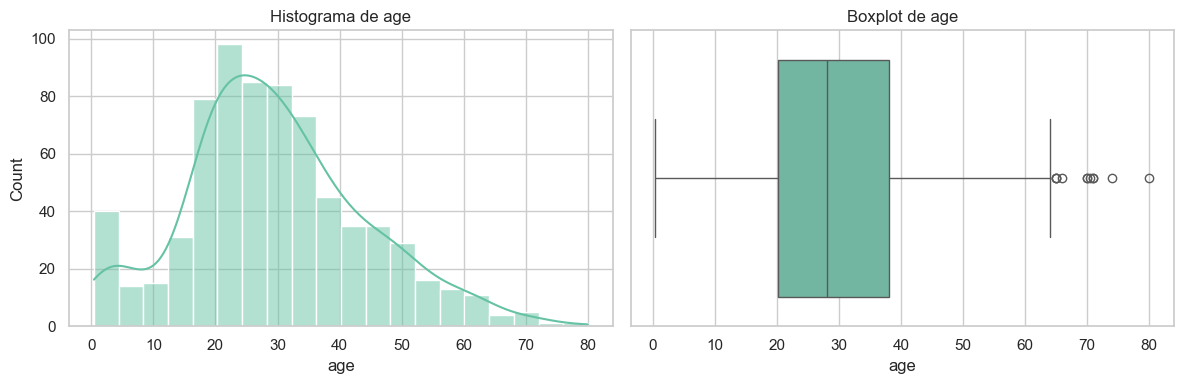

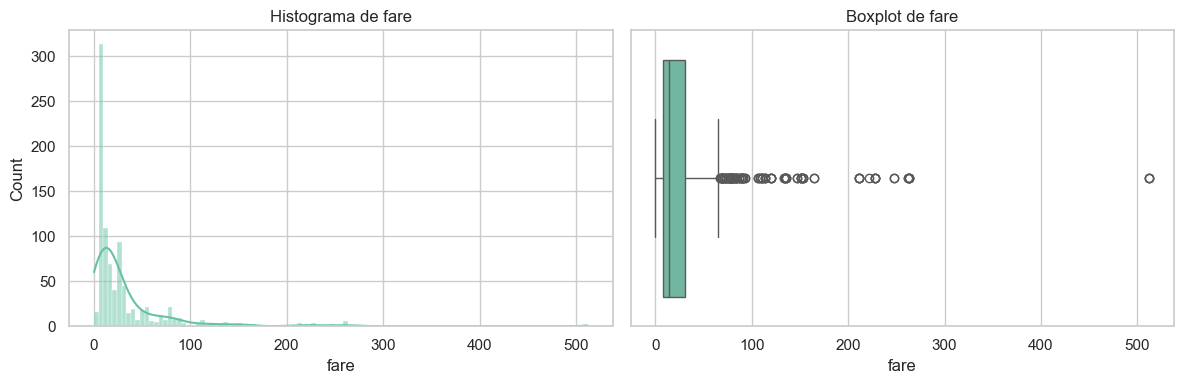

In [8]:
# Histogramas y boxplots para variables numericas clave
numeric_targets = ["age", "fare"]
for col in numeric_targets:
    if col in df.columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        sns.histplot(df[col].dropna(), kde=True, ax=axes[0])
        axes[0].set_title(f"Histograma de {col}")
        sns.boxplot(x=df[col], ax=axes[1])
        axes[1].set_title(f"Boxplot de {col}")
        plt.tight_layout()
        plt.show()

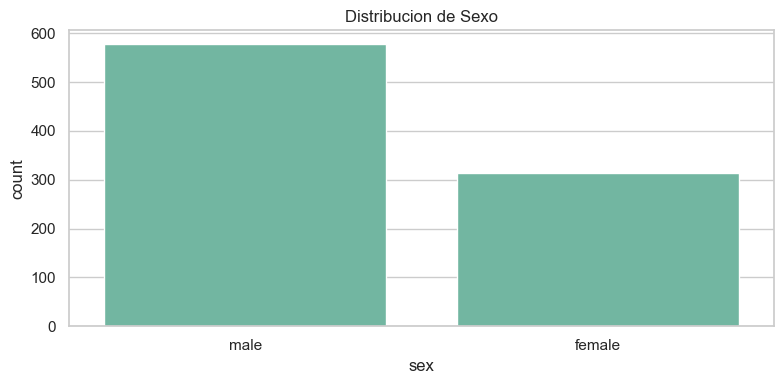

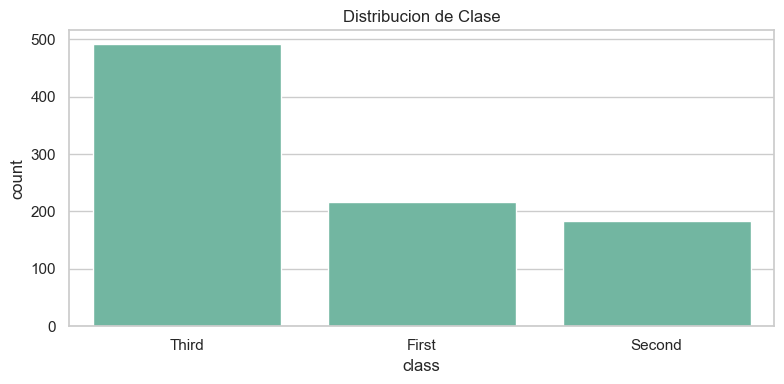

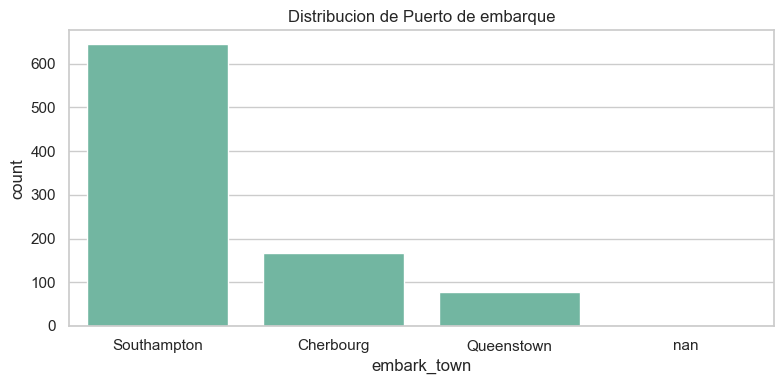

In [9]:
# Graficos de barras para variables categoricas
categorical_targets = {
    "sex": "Sexo",
    "class": "Clase",
    "embark_town": "Puerto de embarque"
}
for col, label in categorical_targets.items():
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts(dropna=False).index)
        plt.title(f"Distribucion de {label}")
        plt.tight_layout()
        plt.show()

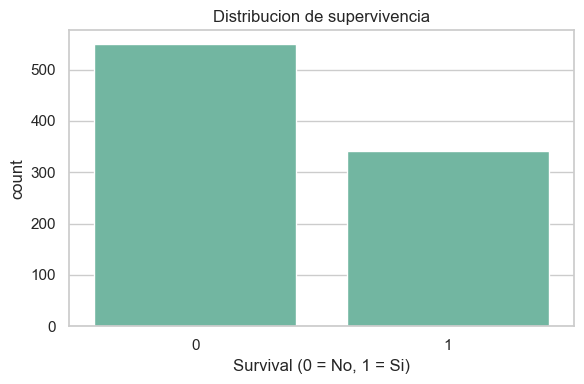

In [10]:
# Sobrevivientes versus no sobrevivientes
if "survived" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x="survived")
    plt.title("Distribucion de supervivencia")
    plt.xlabel("Survival (0 = No, 1 = Si)")
    plt.tight_layout()
    plt.show()

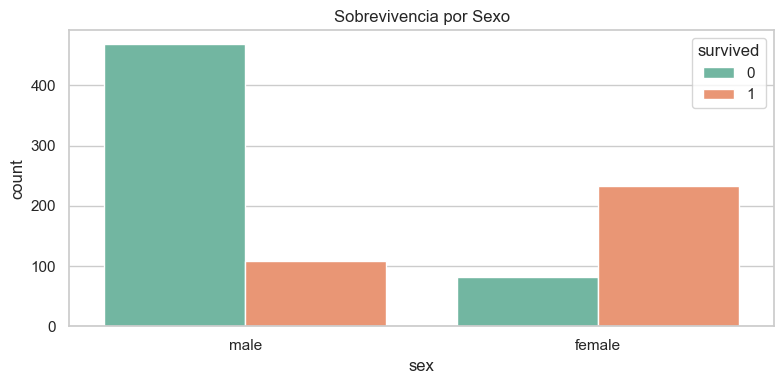

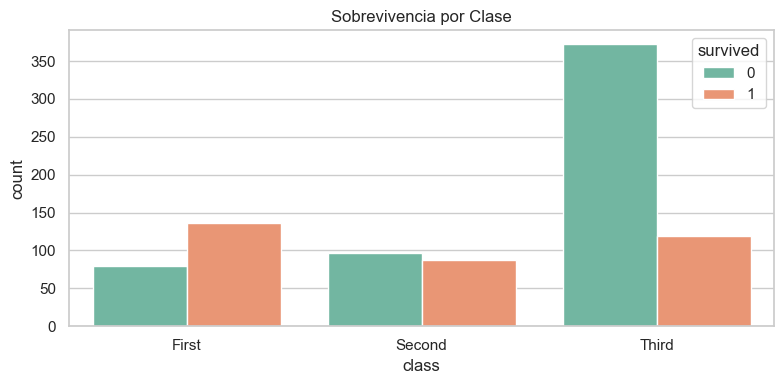

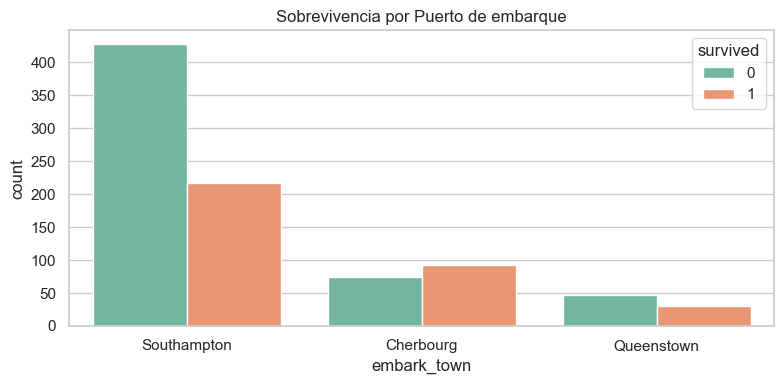

In [11]:
# Sobrevivencia por sexo, clase y puerto de embarque
for col, label in categorical_targets.items():
    if {"survived", col}.issubset(df.columns):
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, hue="survived")
        plt.title(f"Sobrevivencia por {label}")
        plt.tight_layout()
        plt.show()

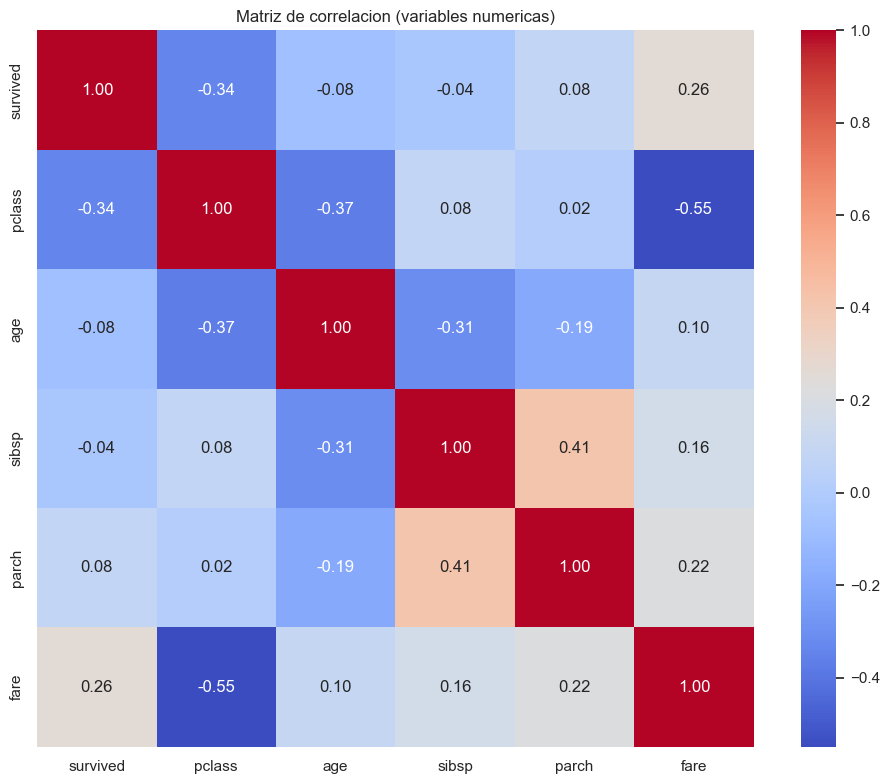

In [12]:
# Matriz de correlacion para variables numericas
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlacion (variables numericas)")
plt.tight_layout()
plt.show()

## Conversión de variables categóricas a numéricas sin sesgo

Aplicamos una codificación que mantiene la información de cada categoría sin imponer un orden artificial.

In [ ]:
# Conversión a variables numéricas evitando introducir sesgo
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
bool_cols = df.select_dtypes(include=['bool']).columns

df_encoded = df.copy()

# Convertimos booleanos a enteros explícitos
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

df_encoded = pd.get_dummies(
    df_encoded,
    columns=categorical_cols,
    drop_first=False,  # mantenemos todas las categorías para no fijar un grupo de referencia
    dummy_na=True,      # preserva la información de valores faltantes
    dtype=int
)

print('Dimensiones después de codificar:', df_encoded.shape)
df_encoded.head()

La estrategia evita sesgos porque:
- **No** asignamos números ordinales a categorías nominales (p. ej. `sex`, `embark_town`), evitando que el modelo interprete jerarquías que no existen.
- Convertimos cada categoría en su propia columna (`one-hot encoding`) para que la influencia de cada grupo se aprenda de forma independiente.
- Incluimos indicadores `NaN` con `dummy_na=True` para que la ausencia de información no fuerce al modelo a asumir otra categoría.
- Las variables booleanas quedan en formato 0/1 de manera explícita y consistente.

## Observaciones

- Las pasajeras tienen una tasa de supervivencia notablemente mayor que los pasajeros masculinos.
- Los boletos de primera clase muestran mayor proporcion de supervivientes comparado con segunda y tercera clase.
- Los pasajeros que embarcaron en Cherbourg tienden a sobrevivir mas que quienes embarcaron en Southampton o Queenstown.
- Las tarifas mas altas (fare) se asocian con mayor probabilidad de supervivencia, alineado con la ventaja de las clases altas.